# Routh Array

In [53]:
try:
    from tbcontrol.symbolic import routh
except:
    !pip install tbcontrol
    from tbcontrol.symbolic import routh

import numpy as np
from sympy import *
sympy.init_printing()

s = sympy.Symbol('s')
a_0, a_1, a_2, a_3, a_4 = sympy.symbols('a_0:5')
K_c = sympy.Symbol('K_c')

In [54]:
help(routh)

Help on function routh in module tbcontrol.symbolic:

routh(p)
    Construct the Routh-Hurwitz array given a polynomial in s
    
    Input: p - a sympy.Poly object
    Output: The Routh-Hurwitz array as a sympy.Matrix object



## Basics

In [55]:
p = a_0 + a_1*s**1 + a_2*s**2 + a_3*s**3 + a_4*s**4
p = sympy.Poly(p, s)
p

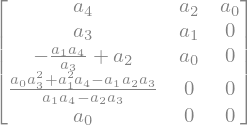

In [56]:
routh(p)

## Example 1

In [57]:
p = s**3 + s**2 + s + 2
p = sympy.Poly(p, s)
p

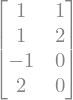

In [58]:
routh(p)

## Example 2

In [59]:
p = s**3 + 4*s**2 + 8*s + 4
p = sympy.Poly(p, s)
p

In [60]:
RA = routh(p)

In [61]:
if min(RA[:, 0]) > 0:
    print('Stable')
else:
    print('Unstable')

Stable


In [62]:
h = 1
pa = p.subs(s,s-h)
pa = sympy.Poly(pa, s)
pa

In [63]:
RAa = routh(pa)

In [64]:
if min(RAa[:, 0]) > 0:
    print('Poles are left of s = -'+str(h))
else:
    print('Poles not left of s = -'+str(h))

Poles not left of s = -1


## Example 3

In [65]:
G = 1/((1+0.1*s)*(1+0.2*s)*(1+0.3*s))
Gcl = G/(1 + K_c * G)
n,d = fraction(Gcl.simplify())
p = d.expand()

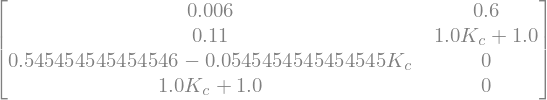

In [66]:
RA = routh(sympy.Poly(p, s))
RA

In [67]:
sympy.solve([e > 0 for e in RA[:, 0]], K_c)

In [103]:
for k_c in np.arange(-2,12):
    r = roots(d.subs(K_c,k_c))
    N = len(r)
    real_part = [re(e) for e in list(r)[0:N]]
    msgs = 'Stable'
    if max(real_part) >= 0:
        msgs = 'Unstable'        
    print(f'K_c = {k_c:2d} and '+msgs)

K_c = -2 and Unstable
K_c = -1 and Unstable
K_c =  0 and Stable
K_c =  1 and Stable
K_c =  2 and Stable
K_c =  3 and Stable
K_c =  4 and Stable
K_c =  5 and Stable
K_c =  6 and Stable
K_c =  7 and Stable
K_c =  8 and Stable
K_c =  9 and Stable
K_c = 10 and Unstable
K_c = 11 and Unstable
